# Stock market prediction



Our team:
- Babics Bence
- Osváth Barnabás
- Tamás Ferenc

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Data Provider
- Our data provider will be alpha vantage (https://www.alphavantage.co/) who sends share prices every minute
- They have a Python library to make our job easier
- They are able to send data every minute while the stock market is open

We are working on Google Cloud but results of our exploratory study can be found in this notebook

In [0]:
# Data was downloaded from AlphaVenture api

google = pd.read_csv('https://raw.githubusercontent.com/bmedl/platform/master/deep_learning_data/amd_data_1004_1014.csv')
apple =  pd.read_csv('https://raw.githubusercontent.com/bmedl/platform/master/deep_learning_data/apple_data_1004_1014.csv')
tesla = pd.read_csv('https://raw.githubusercontent.com/bmedl/platform/master/deep_learning_data/tesla_data_1004_1014.csv')
amd =  pd.read_csv('https://raw.githubusercontent.com/bmedl/platform/master/deep_learning_data/amd_data_1004_1014.csv')
intel =  pd.read_csv('https://raw.githubusercontent.com/bmedl/platform/master/deep_learning_data/intel_data_1004_1014.csv')

In [0]:
google['date'] = pd.to_datetime(google['date'])
apple['date'] = pd.to_datetime(apple['date'])
tesla['date'] = pd.to_datetime(tesla['date'])
amd['date'] = pd.to_datetime(amd['date'])
intel['date'] = pd.to_datetime(intel['date'])

In [0]:
google["sym"] = "Google"
apple["sym"] = "Apple"
intel["sym"] = "Intel"
amd["sym"] = "AMD"
tesla["sym"] = "Tesla"

splitting full date into 2 parts: date and time

In [0]:
google["OnlyDate"] = pd.to_datetime(google['date']).dt.date
google["OnlyTime"] = pd.to_datetime(google['date']).dt.time

apple["OnlyDate"] = pd.to_datetime(apple['date']).dt.date
apple["OnlyTime"] = pd.to_datetime(apple['date']).dt.time

tesla["OnlyDate"] = pd.to_datetime(tesla['date']).dt.date
tesla["OnlyTime"] = pd.to_datetime(tesla['date']).dt.time

amd["OnlyDate"] = pd.to_datetime(amd['date']).dt.date
amd["OnlyTime"] = pd.to_datetime(amd['date']).dt.time

intel["OnlyDate"] = pd.to_datetime(intel['date']).dt.date
intel["OnlyTime"] = pd.to_datetime(intel['date']).dt.time

In [0]:
AllData = google.append(apple).append(intel).append(amd).append(tesla)

The inputs of the planned neural network are the given number (time_steps) of previous datapoints. The output is the closing price of the next datapoint. These two functions construct the arrays of inputs and outputs.

In [0]:
def get_timeseries(df, time_steps):
  dim_0 = df.shape[0] - time_steps
  dim_1 = df.shape[1]
  x = np.zeros((dim_0, time_steps, dim_1))
  y = np.zeros((dim_0,))

  for i in range(dim_0):
    x[i] = df[i:time_steps+i]
    y[i] = df[time_steps+i, 3]
  return x, y

#this function makes sure that the length of the input array will be divisible with the chosen batch size
def trim_dataset(df, batch_size):
    no_of_rows_drop = df.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return df[:-no_of_rows_drop]
    else:
        return df      

## Exploratory study

Dataset of Google stock prices, from 2019.10.04 9:31 (EDT) to 2019.10.09. 16:00 (five days of open market). It contains minutely data of opening, closing, highest, lowest price and the volume of the stocks.

We check what the format of the data is like

In [14]:
google.head(3)

,date,1. open,2. high,3. low,4. close,5. volume,sym,OnlyDate,OnlyTime
0,2019-10-04 09:31:00,28.83,29.03,28.8100,28.9301,1103204,Google,2019-10-04,09:31:00
1,2019-10-04 09:32:00,28.93,29.05,28.9123,29.0200,424048,Google,2019-10-04,09:32:00
2,2019-10-04 09:33:00,29.02,29.03,28.8600,28.8755,307261,Google,2019-10-04,09:33:00


Different days were plotted in order to investigate how the stock prices moved from time to time while stock exchange was open.

### Google prices

OnlyDate
2019-10-04    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-07    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-08    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-09    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-10    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-11    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

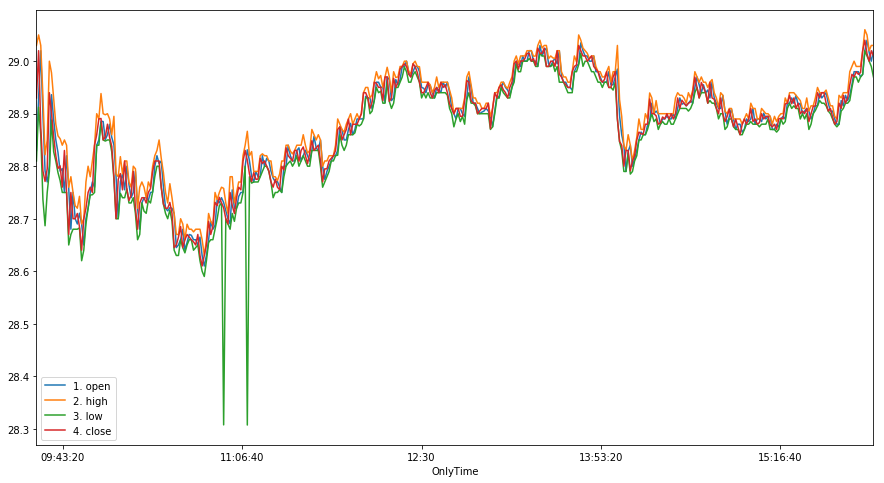

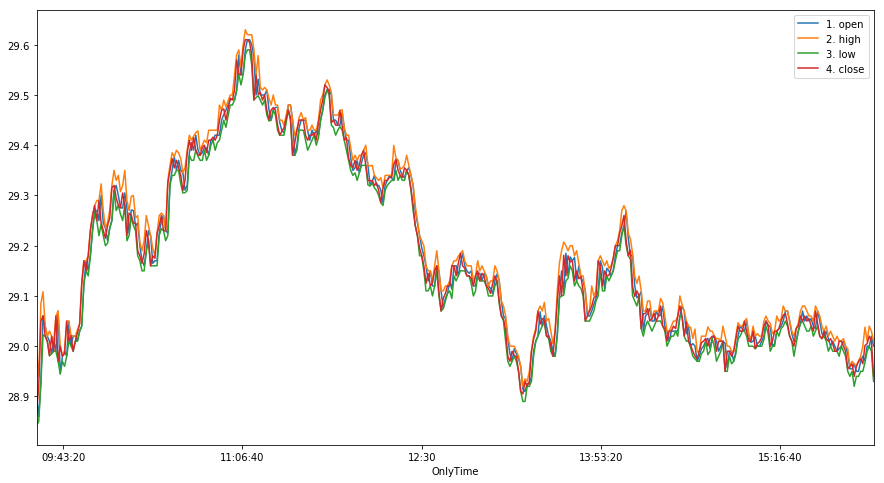

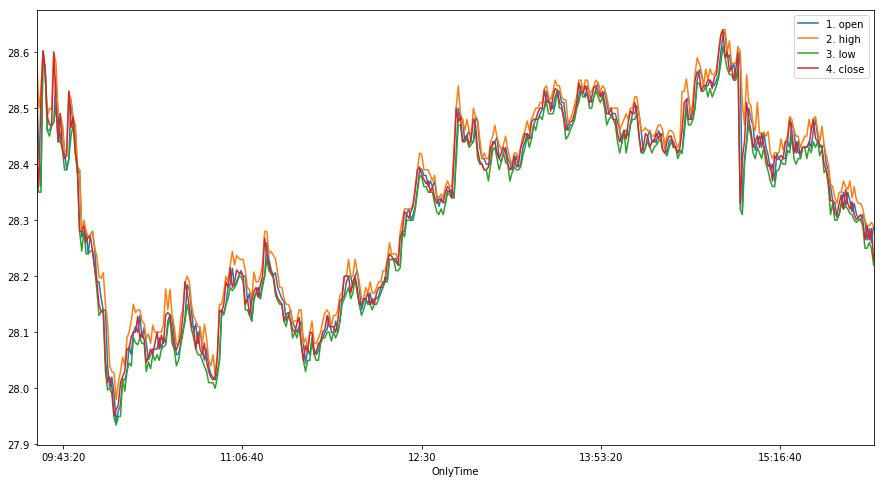

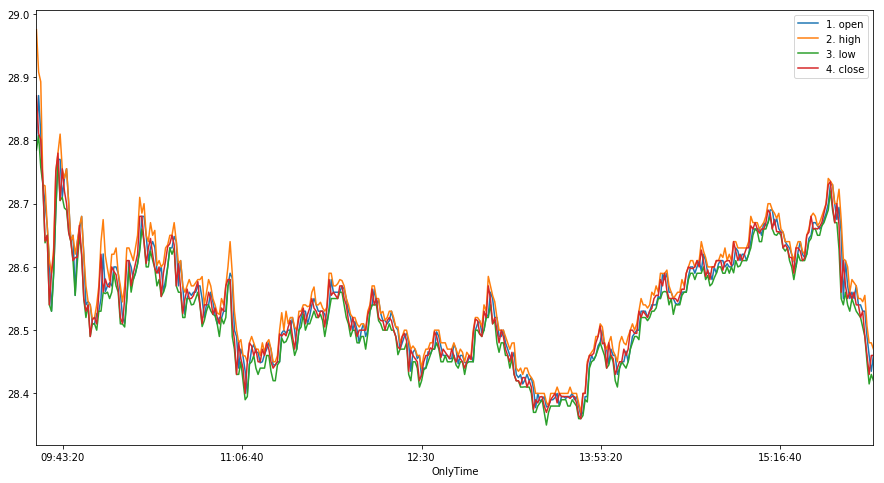

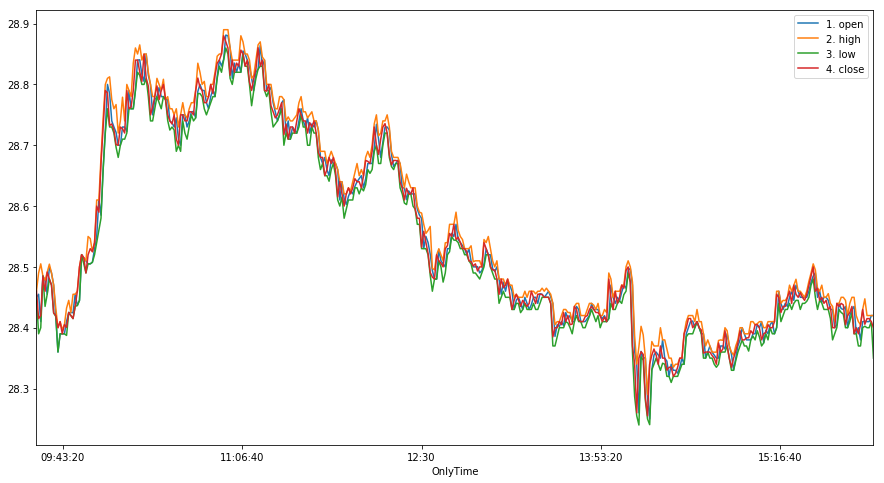

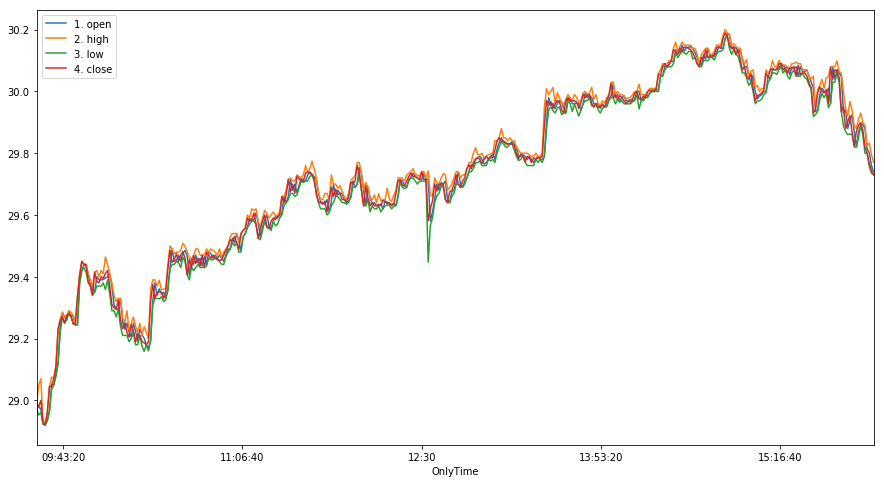

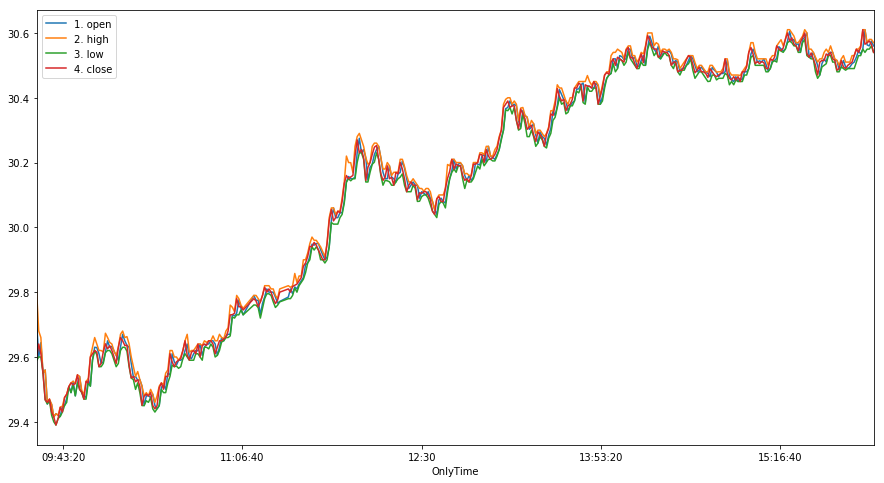

In [15]:
google.set_index(google['OnlyTime']).groupby("OnlyDate")[["1. open", "2. high",	"3. low",	"4. close"]].plot(figsize=(15,8))

### Apple

OnlyDate
2019-10-04    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-07    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-08    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-09    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-10    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-11    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

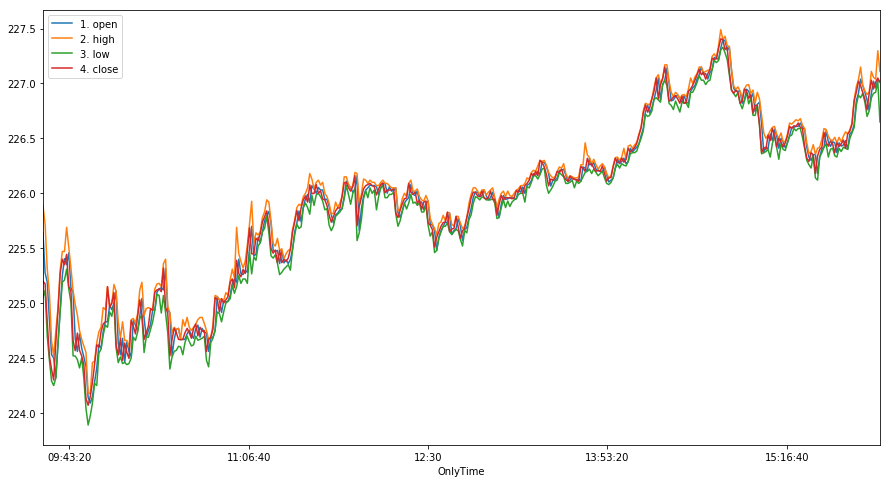

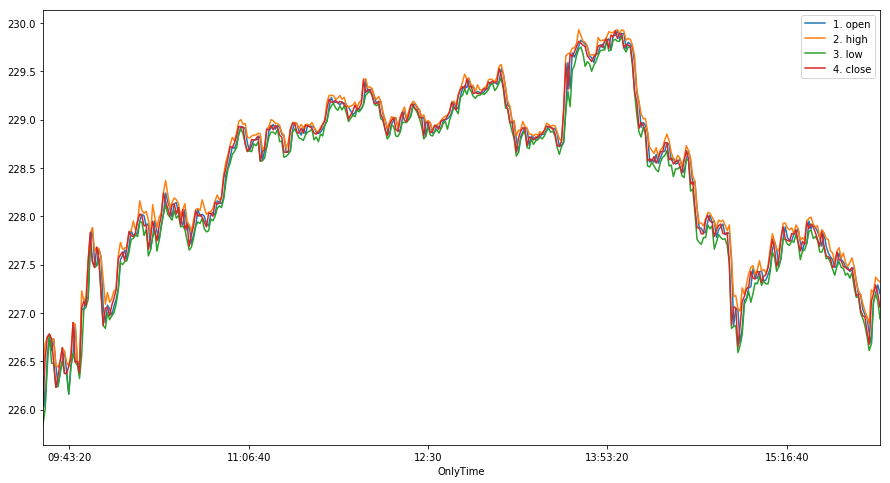

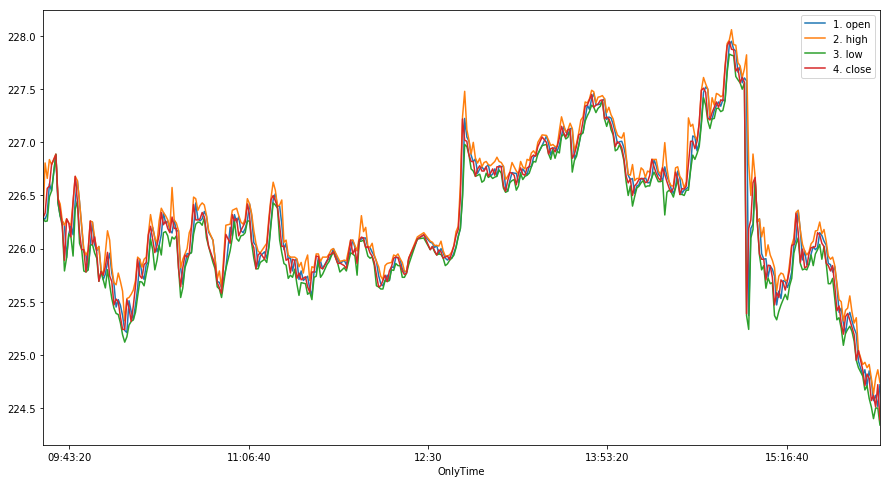

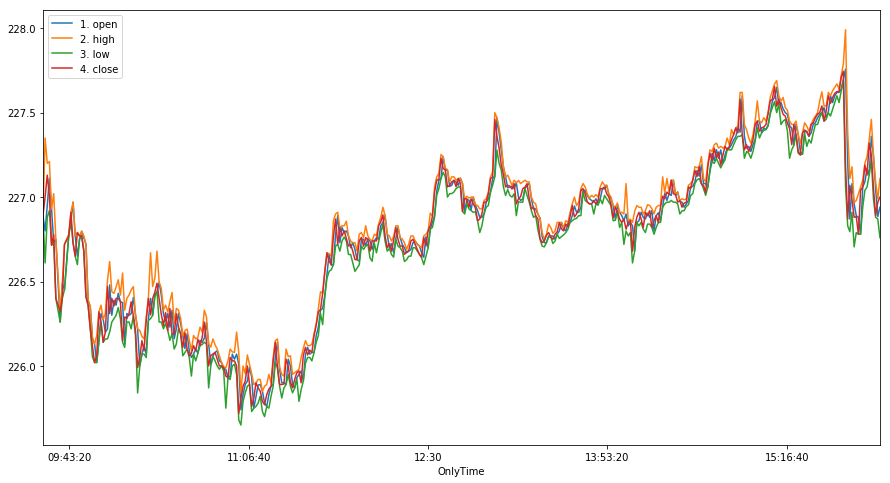

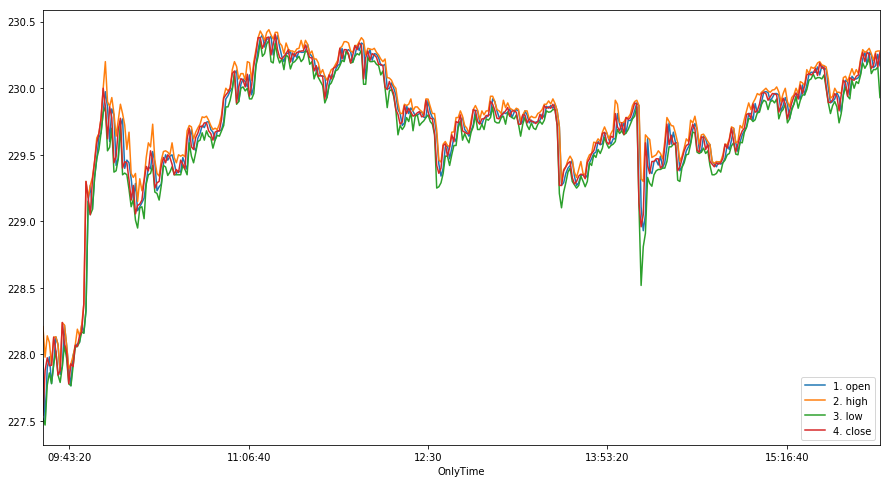

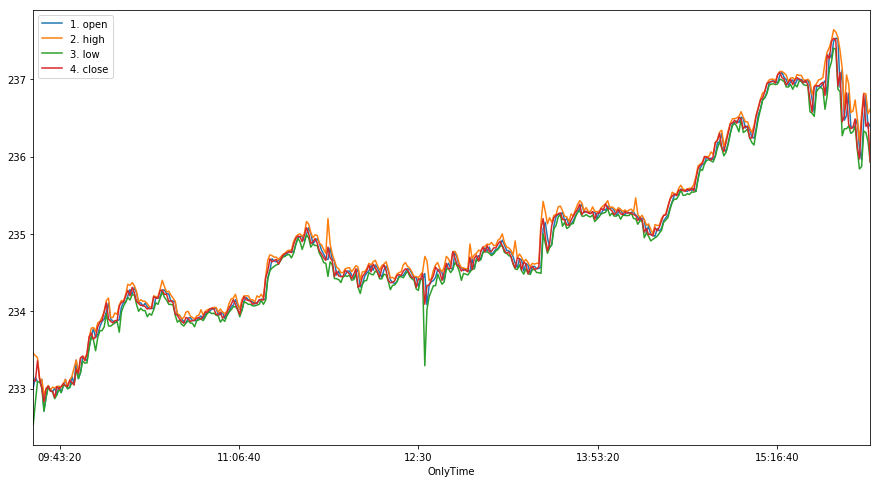

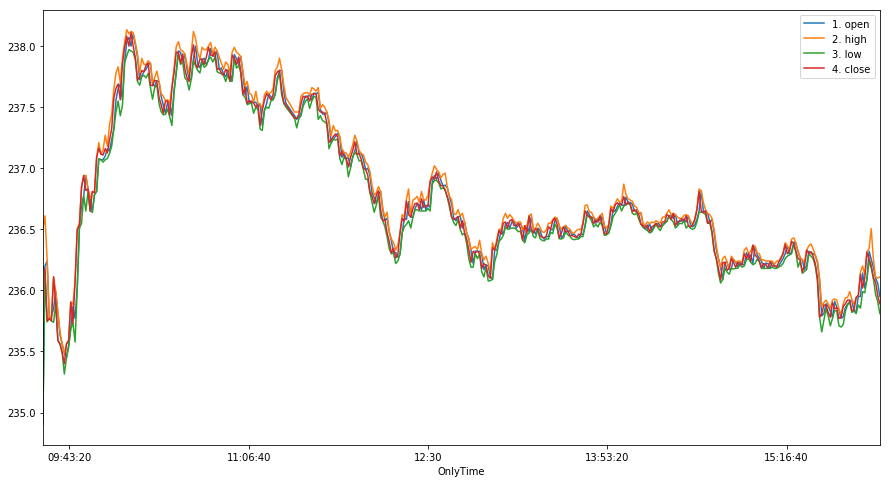

In [16]:
apple.set_index(apple['OnlyTime']).groupby("OnlyDate")[["1. open", "2. high",	"3. low",	"4. close"]].plot(figsize=(15,8))

### Tesla

OnlyDate
2019-10-04    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-07    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-08    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-09    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-10    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-11    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

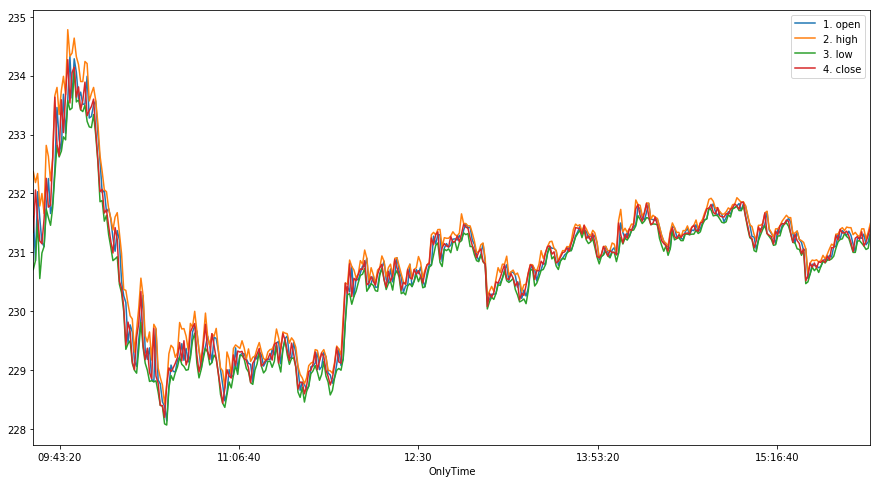

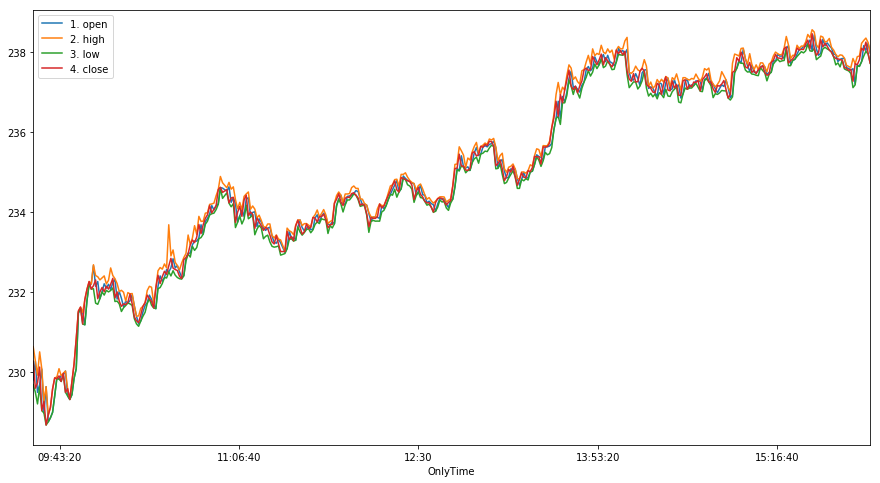

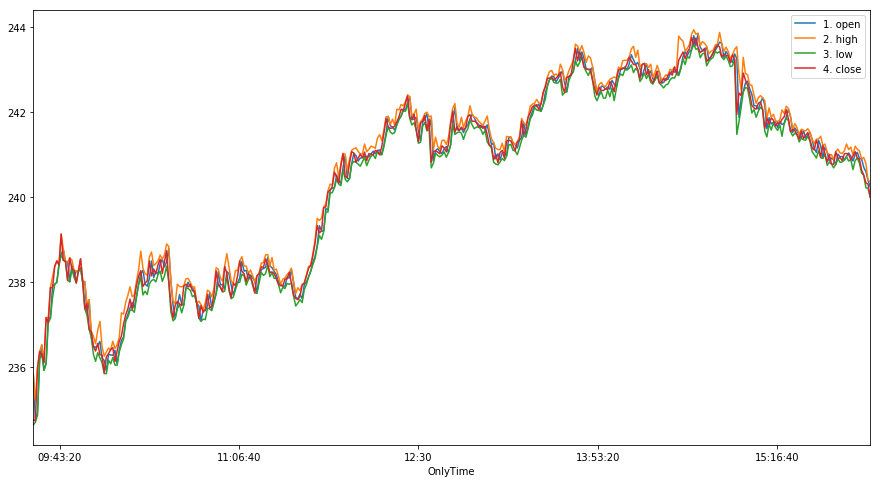

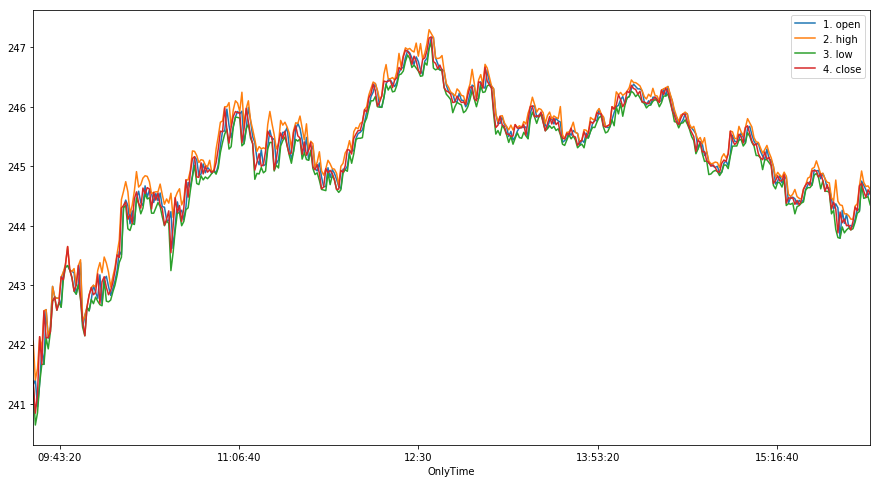

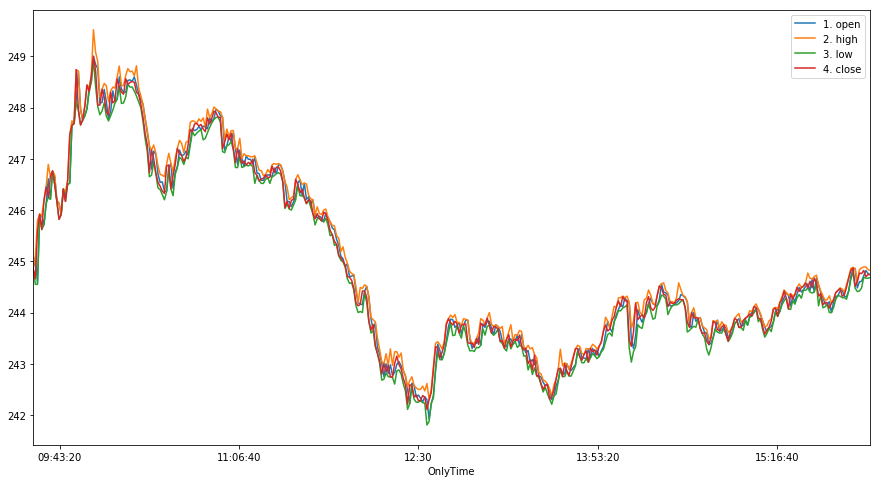

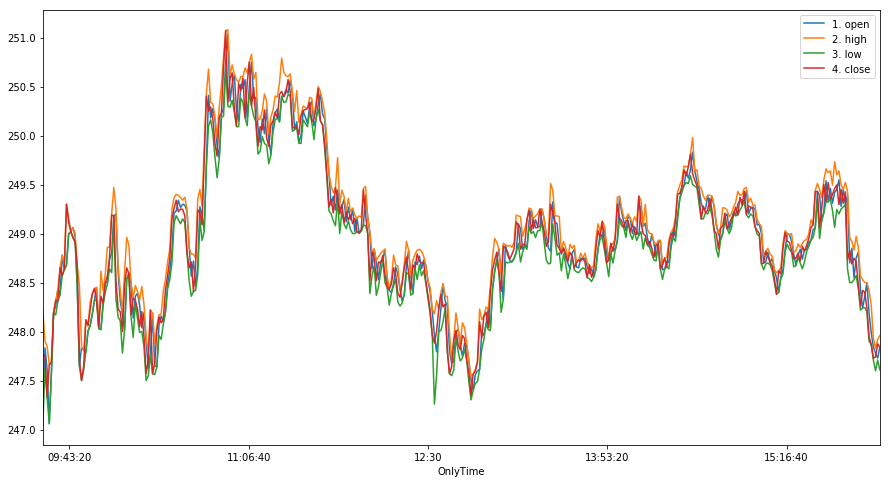

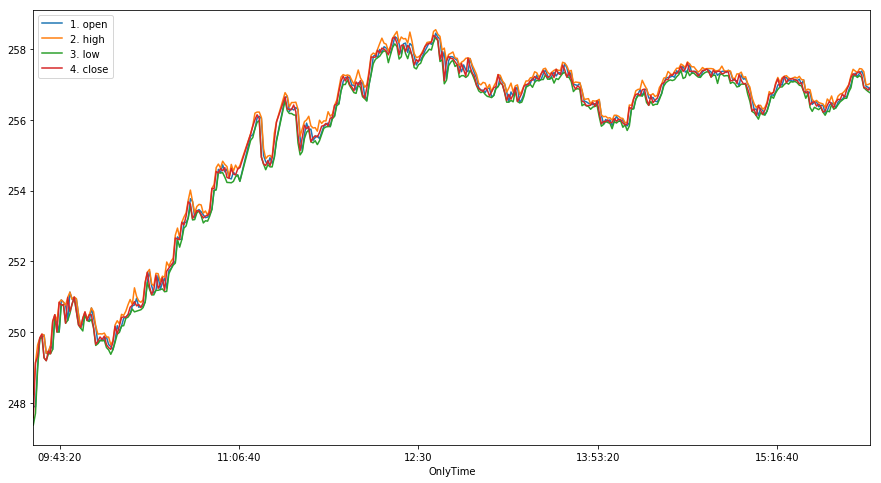

In [17]:
tesla.set_index(tesla['OnlyTime']).groupby("OnlyDate")[["1. open", "2. high",	"3. low",	"4. close"]].plot(figsize=(15,8))

### Intel

OnlyDate
2019-10-04    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-07    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-08    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-09    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-10    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-11    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

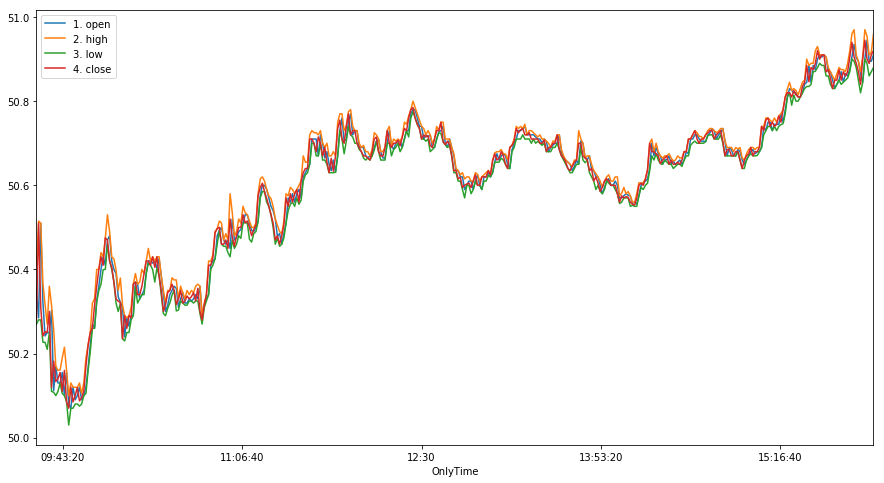

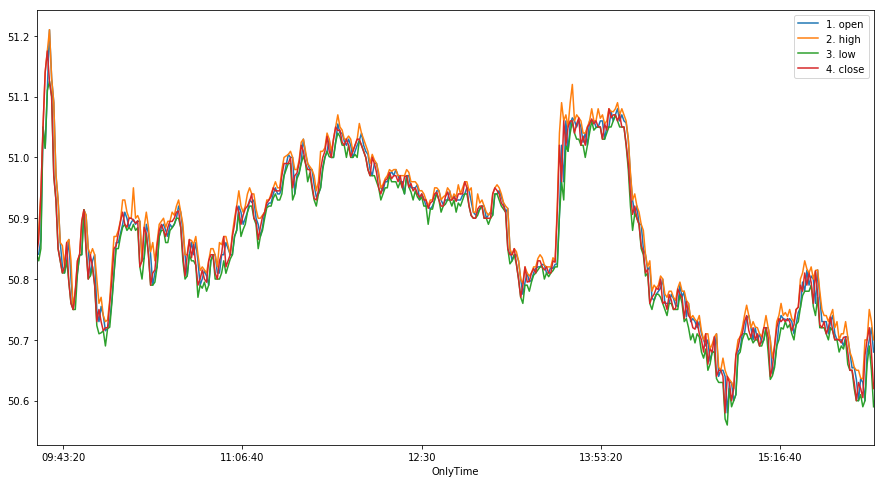

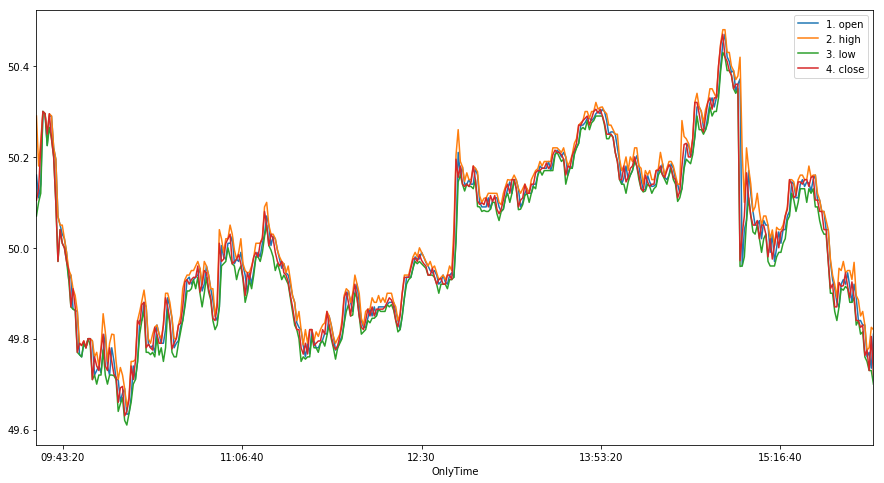

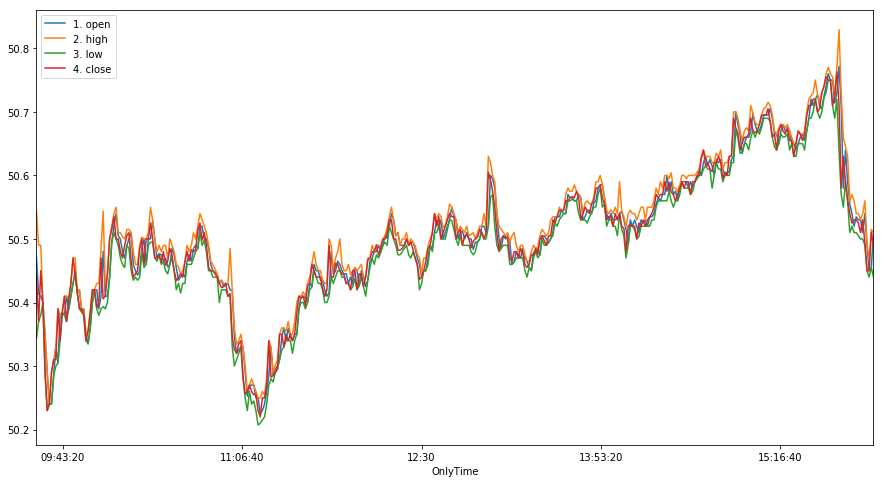

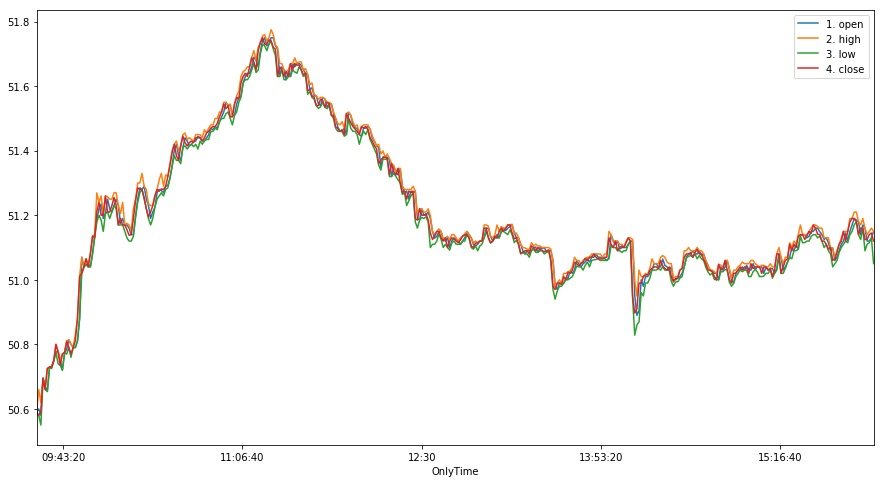

In [0]:
intel.set_index(intel['OnlyTime']).groupby("OnlyDate")[["1. open", "2. high",	"3. low",	"4. close"]].plot(figsize=(15,8))

### AMD

In [0]:
amd.set_index(amd['OnlyTime']).groupby("OnlyDate")[["1. open", "2. high",	"3. low",	"4. close"]].plot(figsize=(15,8))

### About the statistics
- The most important features were analysed with some statistical methods
- Some remarks about the statistics:
  - available data for different days were changed - not every data point was provided
  - the data points available all had proper values for each symbol

In [0]:
AllData.head(5)

In [0]:
AllData.groupby(["sym", "OnlyDate"])[["OnlyDate", "1. open", "2. high",	"3. low",	"4. close"]].describe().T

In [0]:
google.groupby("OnlyDate")[["OnlyDate", "1. open", "2. high",	"3. low",	"4. close"]].describe().T

## Missing Data

Stock exchanges are open from 9:30 to 16:00
- 390 minutes (data points) are the ideal that the API should provide.
- Data points were counted for different days and it was divided with the ideal number (390). It provided a percentage ratio: how many data points were provided by the API.


First it we checked the distribution of the missing data and summarized it in a table

In [0]:
(AllData.groupby(["sym","OnlyDate"])[["1. open", "2. high",	"3. low",	"4. close"]].count()/390*100)

The table above is visualized with a plot.

In [0]:
(AllData.groupby(["OnlyDate","sym"])[["1. open", "2. high",	"3. low",	"4. close"]].count()/390*100).plot(kind='bar', figsize=(10,6))

The following table shows how many data points are missing for each symbol

In [0]:
((AllData.groupby(["sym","OnlyDate"])[["1. open", "2. high",	"3. low",	"4. close"]].count()-390)*-1)

In [0]:
((AllData.groupby(["sym","OnlyDate"])[["1. open", "2. high",	"3. low",	"4. close"]].count()-390)*-1).plot(kind="bar", figsize=(10,6))

This exploratory study helped us decide which data we should use from this API (Google data was inadequate).

# Transform the data to become suitable for neural networks

This train test split would be the same for the different stocks. It seems we should use different neural networks for the different securities. The train and test datasets are scaled.

In [0]:
test_split = 0.1
valid_split = 0.1

data_cols = ['1. open','2. high', '3. low', '4. close', '5. volume']

scaler = MinMaxScaler()

In [0]:
amd_train, amd_test = train_test_split(amd, train_size = 0.8, test_size = 0.2, shuffle = False)

amd_x = amd_train.loc[:, data_cols].values



amd_x_train = scaler.fit_transform(amd_x)
amd_x_test = scaler.transform(amd_test.loc[:, data_cols].values)



amd_x_train, amd_y_train = get_timeseries(amd_x_train, 60)
amd_x_train = trim_dataset(amd_x_train, 32)
amd_y_train = trim_dataset(amd_y_train, 32)

amd_x_val_test, amd_y_val_test = get_timeseries(amd_x_test, 60)
amd_x_val, amd_x_test = np.split(trim_dataset(amd_x_val_test, 32),2)
amd_y_val, amd_y_test = np.split(trim_dataset(amd_y_val_test, 32),2)

amd_x_train 